In [2]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', 100)

In [4]:
df = pd.read_csv("../artifacts/abo-images-small/images/metadata/images.csv.gz")
df.head()

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [5]:
df[df["image_id"] == "717gxIR99XL"]["path"].to_list()[0]

'f2/f24e42d9.jpg'

In [6]:
pj = pd.read_json("../artifacts/abo-listings/listings/metadata/listings_0.json.gz", lines=True)
pj.head(2)

,brand,bullet_point,color,item_id,item_name,model_name,model_number,model_year,product_type,style,...,item_weight,material,fabric_type,color_code,product_description,spin_id,3dmodel_id,pattern,finish_type,item_shape
0,"[{'language_tag': 'nl_NL', 'value': 'find.'}]","[{'language_tag': 'nl_NL', 'value': 'Schoen in...","[{'language_tag': 'nl_NL', 'value': 'Veelkleur...",B06X9STHNG,"[{'language_tag': 'nl_NL', 'value': 'Amazon-me...","[{'language_tag': 'nl_NL', 'value': '37753'}]",[{'value': '12-05-04'}],[{'value': 2017}],[{'value': 'SHOES'}],"[{'language_tag': 'nl_NL', 'value': 'Gesloten-...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'language_tag': 'es_MX', 'value': 'AmazonBas...","[{'language_tag': 'es_MX', 'value': 'White Pow...","[{'language_tag': 'es_MX', 'value': 'White Pow...",B07P8ML82R,"[{'language_tag': 'es_MX', 'value': '22"" Botto...",NaN,[{'value': 'AB5013-R22-10'}],NaN,[{'value': 'HARDWARE'}],"[{'language_tag': 'es_MX', 'value': '10 pares'}]",...,"[{'normalized_value': {'unit': 'pounds', 'valu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
listing_meta = pd.read_json("../artifacts/abo-listings/listings/metadata/listings_0.json.gz", lines=True)

def func_in_en_us_(x):
    if isinstance(x, list):  # Check if x is a list before iterating
        us_texts = [item["value"] for item in x if item["language_tag"] == "en_US"]
        return us_texts[0] if us_texts else None
    else:
        return None  # Handle cases where x is not a list (e.g., a float)

listing_meta = listing_meta.assign(brand_in_en_us=listing_meta.brand.apply(func_in_en_us_))
listing_meta = listing_meta.assign(bullet_point_in_en_us=listing_meta.bullet_point.apply(func_in_en_us_))
listing_meta = listing_meta.assign(color_in_en_us=listing_meta.color.apply(func_in_en_us_))
listing_meta = listing_meta.assign(fabric_type_in_en_us=listing_meta.fabric_type.apply(func_in_en_us_))
listing_meta = listing_meta.assign(finish_type_in_en_us=listing_meta.finish_type.apply(func_in_en_us_))
listing_meta = listing_meta.assign(item_keywords_in_en_us=listing_meta.item_keywords.apply(func_in_en_us_))
listing_meta = listing_meta.assign(item_name_in_en_us=listing_meta.item_name.apply(func_in_en_us_))
listing_meta = listing_meta.assign(item_shape_in_en_us=listing_meta.item_shape.apply(func_in_en_us_))
listing_meta = listing_meta.assign(material_in_en_us=listing_meta.material.apply(func_in_en_us_))
listing_meta = listing_meta.assign(model_name_in_en_us=listing_meta.model_name.apply(func_in_en_us_))
listing_meta = listing_meta.assign(pattern_in_en_us=listing_meta.pattern.apply(func_in_en_us_))
listing_meta = listing_meta.assign(product_description_in_en_us=listing_meta.product_description.apply(func_in_en_us_)) 

listing_meta = listing_meta.drop(columns=['brand', 'bullet_point', 'color', 'fabric_type', 'finish_type', 'item_keywords', 
                                            'item_name', 'item_shape', 'material', 'model_name', 'model_number', 'pattern', 
                                            'product_description', 'style', 'node', 'model_year', 'item_dimensions', 'item_weight'])

listing_meta = listing_meta[~listing_meta.item_name_in_en_us.isna()]

print(f" number products with US English title: {len(listing_meta)}")

listing_meta.head(2)

 number products with US English title: 1655


,item_id,product_type,main_image_id,other_image_id,country,marketplace,domain_name,color_code,spin_id,3dmodel_id,...,color_in_en_us,fabric_type_in_en_us,finish_type_in_en_us,item_keywords_in_en_us,item_name_in_en_us,item_shape_in_en_us,material_in_en_us,model_name_in_en_us,pattern_in_en_us,product_description_in_en_us
7,B0896LJNLH,[{'value': 'DRINKING_CUP'}],61izEZdhlaL,"[717gxIR99XL, 51fzW5BNdVL, 21xD1NzxObL]",US,Amazon,amazon.com,NaN,NaN,NaN,...,Clear,None,None,crystal,AmazonBasics Serene 16-Piece Old Fashioned and...,None,None,None,None,None
18,B07HCR1LSQ,[{'value': 'EARRING'}],61kDp2x8tPL,NaN,JP,Amazon,amazon.co.jp,NaN,NaN,NaN,...,None,None,None,None,[Find] Amazon Collection Platinum Plated Sterl...,None,None,None,None,None


In [8]:
image_meta = pd.read_csv("../artifacts/abo-images-small/images/metadata/images.csv.gz")
dataset = listing_meta.merge(image_meta, left_on="main_image_id", right_on="image_id")
dataset = dataset.drop(columns=['image_id', 'main_image_id'])
dataset.head(2)

,item_id,product_type,other_image_id,country,marketplace,domain_name,color_code,spin_id,3dmodel_id,brand_in_en_us,...,item_keywords_in_en_us,item_name_in_en_us,item_shape_in_en_us,material_in_en_us,model_name_in_en_us,pattern_in_en_us,product_description_in_en_us,height,width,path
0,B0896LJNLH,[{'value': 'DRINKING_CUP'}],"[717gxIR99XL, 51fzW5BNdVL, 21xD1NzxObL]",US,Amazon,amazon.com,NaN,NaN,NaN,AmazonBasics,...,crystal,AmazonBasics Serene 16-Piece Old Fashioned and...,None,None,None,None,None,1197,894,07/075e5d67.jpg
1,B07HCR1LSQ,[{'value': 'EARRING'}],NaN,JP,Amazon,amazon.co.jp,NaN,NaN,NaN,None,...,None,[Find] Amazon Collection Platinum Plated Sterl...,None,None,None,None,None,1000,1000,c9/c923418f.jpg


In [9]:
def func_image_path_(image_ids):
    if isinstance(image_ids, list):
        image_paths = [image_meta[image_meta["image_id"] == image_id]["path"].to_list()[0] for image_id in image_ids]
        return image_paths if image_paths else None
    else:
        return None  

In [10]:
dataset = dataset.assign(other_image_id_path=dataset.other_image_id.apply(func_image_path_)) 

In [11]:
dataset.head()

,item_id,product_type,other_image_id,country,marketplace,domain_name,color_code,spin_id,3dmodel_id,brand_in_en_us,...,item_name_in_en_us,item_shape_in_en_us,material_in_en_us,model_name_in_en_us,pattern_in_en_us,product_description_in_en_us,height,width,path,other_image_id_path
0,B0896LJNLH,[{'value': 'DRINKING_CUP'}],"[717gxIR99XL, 51fzW5BNdVL, 21xD1NzxObL]",US,Amazon,amazon.com,NaN,NaN,NaN,AmazonBasics,...,AmazonBasics Serene 16-Piece Old Fashioned and...,None,None,None,None,None,1197,894,07/075e5d67.jpg,"[f2/f24e42d9.jpg, 2d/2da4a5ac.jpg, ed/ed444f23..."
1,B07HCR1LSQ,[{'value': 'EARRING'}],NaN,JP,Amazon,amazon.co.jp,NaN,NaN,NaN,None,...,[Find] Amazon Collection Platinum Plated Sterl...,None,None,None,None,None,1000,1000,c9/c923418f.jpg,None
2,B075DQBBJZ,[{'value': 'HOME'}],"[91i0jTWScLL, 81GjBMtcfBL, 81rgshp4g4L]",US,Amazon,amazon.com,NaN,NaN,NaN,Rivet,...,Arizona Desert Sand Horizon Photo with Wood Ha...,None,None,None,None,None,2560,2560,c6/c6889ed4.jpg,"[43/4378ccb0.jpg, df/df6ea91e.jpg, 88/88675b16..."
3,B07S74D9T7,[{'value': 'SOUND_AND_RECORDING_EQUIPMENT'}],"[81fMrhXWHfL, 71gfY+SVZKL, 81FCuhRc-rL, 713pBn...",US,Amazon,amazon.com,NaN,07034c59,B07S74D9T7,AmazonBasics,...,AmazonBasics Adjustable Speaker Stand - 3.8 to...,None,None,None,None,None,2560,2560,2b/2b90e918.jpg,"[68/682a2a63.jpg, 69/69eb06dc.jpg, 91/9190b49c..."
4,B01N27SMXC,[{'value': 'SHOES'}],"[71kNNwo3PfL, 716vL8cWNNL, 61EmUPl6s3L, 71oreW...",US,Amazon,amazon.com,[#958070],NaN,NaN,The Fix,...,Amazon Brand - The Fix Women's Foley Tassel Sl...,None,Suede,None,None,None,704,1770,2c/2c0416de.jpg,"[7f/7fe4036c.jpg, ec/ecb157f8.jpg, 10/106f6086..."


In [12]:
dataset.describe()

,height,width
count,1649.000000,1649.000000
mean,1883.850212,1784.369921
std,730.090587,701.741091
min,159.000000,251.000000
25%,1066.000000,1193.000000
50%,2120.000000,1809.000000
75%,2560.000000,2560.000000
max,2560.000000,2560.000000


In [13]:
def display_image_with_index(display_image_index):
    image_path = "../artifacts/abo-images-small/images/small/" + df["path"][display_image_index]
    image_pil = Image.open(image_path).convert('RGB')
    print("Image Info: ", image_pil.format, image_pil.size, image_pil.mode) # (width, height) ; shape is not valid
    plt.figure(figsize = (25,1))
    plt.imshow(image_pil)
    plt.axis('off')
    plt.show()

In [14]:
from pathlib import Path
from sagemaker.s3 import S3Downloader as s3down

sagemaker.config INFO - Not applying SDK defaults from location: /Library/Application Support/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /Users/arindam/Library/Application Support/sagemaker/config.yaml


In [15]:
img = "s3://amazon-berkeley-objects/images/small/82/825982fa.jpg"

In [16]:
local_file_name = Path("82/825982fa.jpg").name

In [17]:
local_file_name

'825982fa.jpg'

In [18]:
import os
import shutil

In [19]:
if os.path.isdir("../artifacts/local_file_name"):
    shutil.rmtree("../artifacts/local_file_name") 

In [20]:
s3down.download(f"s3://amazon-berkeley-objects/images/small/82/825982fa.jpg", "../artifacts/local_file_name")

['../artifacts/local_file_name/825982fa.jpg']

In [21]:
mage_pil = Image.open("../artifacts/local_file_name/825982fa.jpg").convert('RGB')

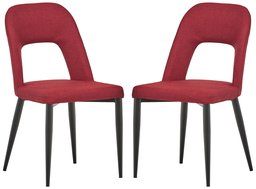

In [22]:
mage_pil

In [23]:
def display_image_with_item(item_id):
    path = dataset[dataset["item_id"] == item_id]["path"].to_list()[0]
    item_desc = dataset[dataset["item_id"] == item_id]["item_name_in_en_us"].to_list()[0]
    image_path = "../artifacts/abo-images-small/images/small/" + path
    image_pil = Image.open(image_path).convert('RGB')
    print("Image Desc: ", item_desc)
    print("Image path: ", image_path)
    plt.figure(figsize = (25,1))
    plt.imshow(image_pil)
    plt.axis('off')
    plt.show()

Image Info:  None (197, 256) RGB


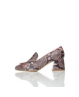

In [24]:
index = 319529
display_image_with_index(index)

Image Desc:  AmazonBasics Serene 16-Piece Old Fashioned and Coolers Glass Drinkware Set
Image path:  ../artifacts/abo-images-small/images/small/07/075e5d67.jpg


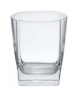

In [25]:
item_id = "B0896LJNLH"
display_image_with_item(item_id)